<a href="https://colab.research.google.com/github/nindywa/UK_ecommerce/blob/main/UK_Ecommerce_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK Gift's E-Commerce

This is a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Description of the features:
- InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product code that consists 5 digits.
- Description: Product name.
- Quantity: The quantities of each product per transaction.
- InvoiceDate: Represents the day and time when each transaction was generated.
- UnitPrice: Product price per unit.
- CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
- Country: Name of the country where each customer resides.

source: https://www.kaggle.com/datasets/carrie1/ecommerce-data

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.cm as cm

# Loading The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/UK Gift Ecommerce/UK Gift Ecommerce.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

## Handling Invalid Data

In [ ]:
#Remove Quantity less than 0
df = df[df['Quantity'] > 0]

In [ ]:
#Remove Unit Price less than 0
df = df[df['UnitPrice'] > 0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Handling Missing Value

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249423
Country        0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(397884, 8)

## Handling Duplicates

In [ ]:
df.duplicated().sum()

5192

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(392692, 8)

## Change Incorrect Data Type

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check data type
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#Change data type InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#Change data type CustomerID to object
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

## Add Additional Column

In [ ]:
df['Sales'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Remove Canceled Transaction From Dataset

In [ ]:
# Separate dataset into completed
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

(392692, 9)

# EDA

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


INSIGHT:
    
- Average quantity bought are 13 product, with minimal product are 1 and maximal product are 80,995
- Average sales are 22.63, with minimal sales are 0.001 and maximal are 168,469.6

In [ ]:
stock = df['StockCode'].value_counts().sort_values(ascending=False).head(10)
stock

85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: StockCode, dtype: int64

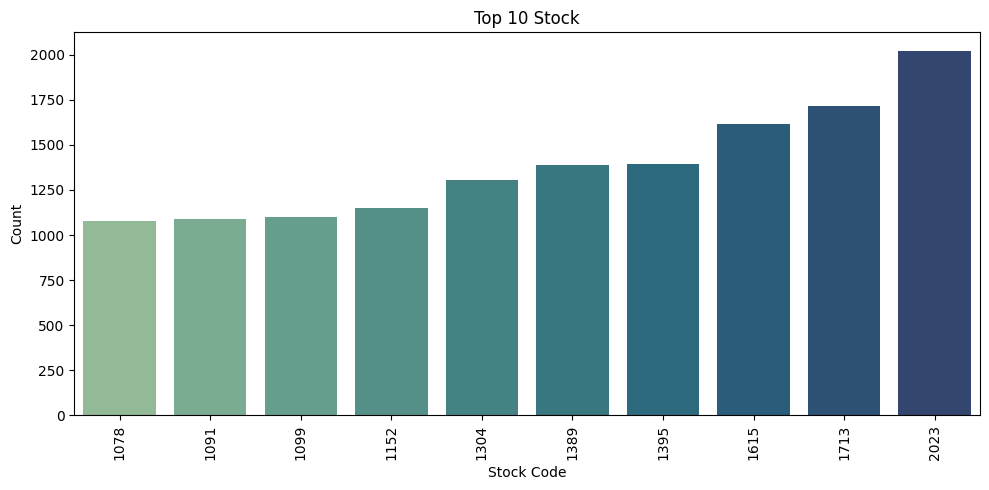

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = stock.index, y=stock.values, data = stock, palette = 'crest')
plt.title('Top 10 Stock')
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()

In [ ]:
top10_countries = df.groupby(['Country'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)
top10_countries

,Country,Sales
35,United Kingdom,7285024.644
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
30,Spain,61558.560
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38367.830


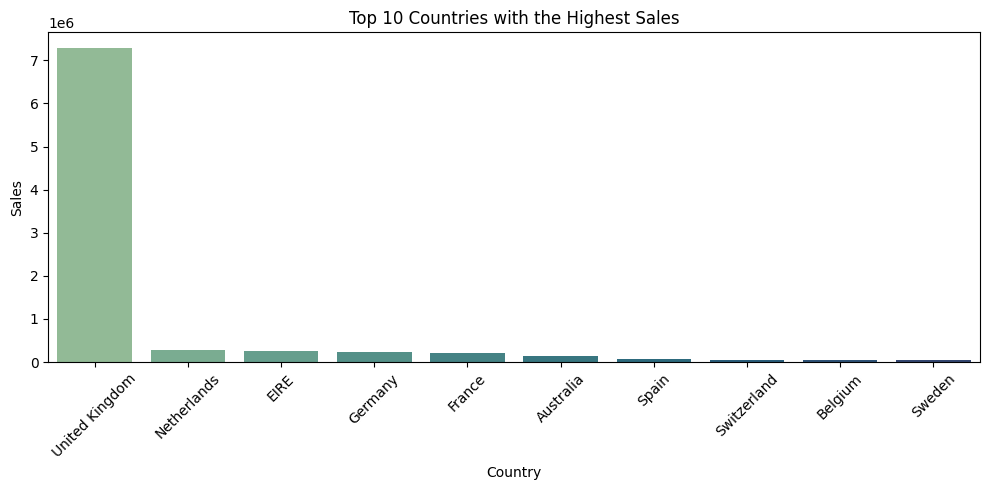

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'Country', y='Sales', data = top10_countries, palette = 'crest')
plt.title('Top 10 Countries with the Highest Sales')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.tight_layout()

INSIGHT:

UK become country with highest sales

In [ ]:
df1 = df.copy()
df1['Month'] = df1['InvoiceDate'].dt.to_period('M')
sales_by_month = df1.groupby(['Month'])['Sales'].sum().reset_index()
sales_by_month

,Month,Sales
0,2010-12,570422.730
1,2011-01,568101.310
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,677355.150
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


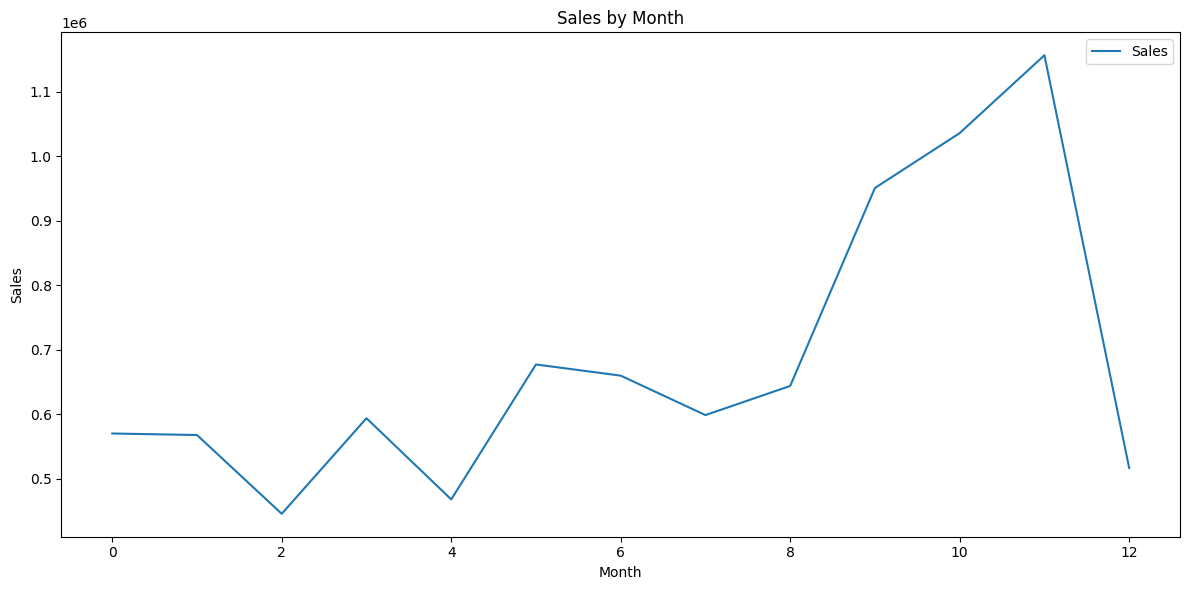

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(data=sales_by_month)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

INSIGHT:
    
November become month with highest sales. Probably, because black friday.

In [ ]:
top10_prod = df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(10)
top10_prod

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706
216,ASSORTED COLOUR BIRD ORNAMENT,35263
2269,PACK OF 72 RETROSPOT CAKE CASES,33670
2600,POPCORN HOLDER,30919
2656,RABBIT NIGHT LIGHT,27153
2047,MINI PAINT SET VINTAGE,26076


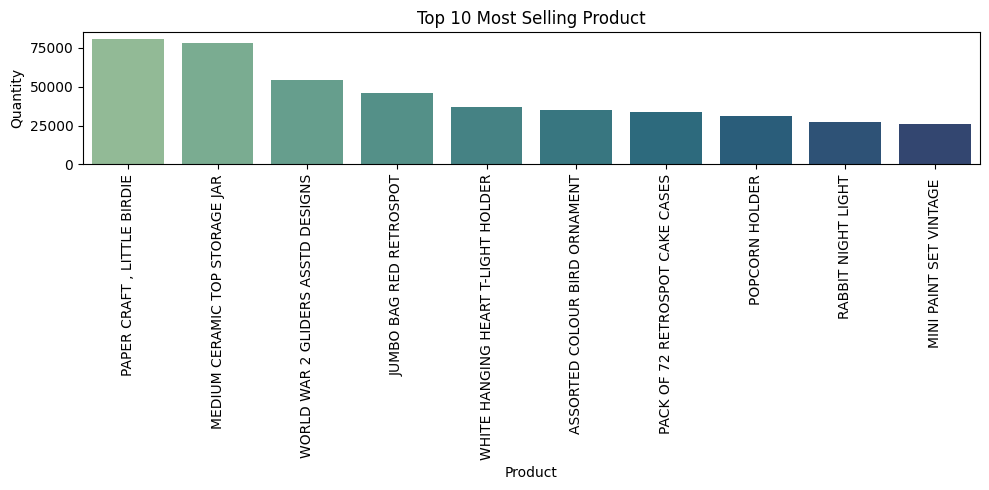

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'Description', y='Quantity', data = top10_prod, palette = 'crest')
plt.title('Top 10 Most Selling Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()

INSIGHT:

Paper Craft, Little Birdie become most selling product.

In [ ]:
avg_sales_cust = df.groupby('CustomerID')['Sales'].mean().reset_index().sort_values('Sales', ascending=False)

In [ ]:
#Top 10 highest customer
avg_sales_cust.head(10)

,CustomerID,Sales
0,12346,77183.600000
3008,16446,56157.500000
2011,15098,13305.500000
2502,15749,4453.430000
2087,15195,3861.000000
597,13135,3096.000000
4013,17846,2033.100000
4191,18087,2027.860000
3071,16532,1687.200000
2678,16000,1377.077778


In [ ]:
#Top 10 lowest customer
avg_sales_cust.tail(10)

,CustomerID,Sales
4141,18015,2.609348
881,13521,2.563947
1982,15060,2.558696
4004,17832,2.547049
2578,15850,2.525591
3590,17254,2.443153
697,13271,2.430920
990,13684,2.245862
3995,17816,2.150588
2315,15503,2.136970


INSIGHT:

Highest average spending by customer are 77,183.6 and the lowest average spending by customer are 2.14

In [ ]:
avg_qty_invoice = df.groupby('InvoiceNo')['Quantity'].mean().reset_index().sort_values('Quantity', ascending=False)

In [ ]:
#Top 10 Invoice with Highest Quantity
avg_qty_invoice.head(10)

,InvoiceNo,Quantity
18499,581483,80995.0
1909,541431,74215.0
7288,554868,4300.0
3109,544612,3906.0
9590,560599,3186.0
15191,573995,3000.0
14795,573003,2400.0
2751,543669,2400.0
2917,544152,2400.0
1692,540815,2348.0


INSIGHT:

Highest average product who bought by customer are 80,995

In [ ]:
avg_sales_invoice = df.groupby('InvoiceNo')['Sales'].mean().reset_index().sort_values('Sales', ascending=False)

In [ ]:
#Top 10 Invoice with Highest Average Sales
avg_sales_invoice.head(10)

,InvoiceNo,Sales
18499,581483,168469.600000
1909,541431,77183.600000
7925,556444,38970.000000
5921,551697,8142.750000
1692,540815,5053.633333
14795,573003,4992.000000
5462,550461,4307.180000
14821,573077,4161.060000
14823,573080,4161.060000
1695,540818,3918.750000


In [ ]:
#Top 10 Invoice with Lowest Average Sales
avg_sales_invoice.tail(10)

,InvoiceNo,Sales
1337,539645,0.950000
794,538194,0.950000
951,538669,0.950000
1728,540945,0.850000
11551,565399,0.780000
18238,580916,0.701111
2379,542736,0.550000
14113,571309,0.456154
12592,567869,0.400000
13789,570554,0.380000


INSIGHT:

Highest average spending by invoice are 168,469.6 and the lowest average spending by customer are 0.38

# Cohort Analysis

In [ ]:
import matplotlib.colors as mcolors
from operator import attrgetter
from sklearn.preprocessing import StandardScaler

In [ ]:
df_cohort = df.copy()

In [ ]:
df_cohort['OrderMonth'] = df_cohort['InvoiceDate'].dt.to_period('M')

In [ ]:
df_cohort['Cohort'] = df_cohort.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [ ]:
df_cohort = df_cohort.groupby(['Cohort','OrderMonth']).agg(n_customers=('CustomerID','nunique')).reset_index(drop=False)

In [ ]:
df_cohort['PeriodNumber'] =(df_cohort['OrderMonth']-df_cohort['Cohort']).apply(attrgetter('n'))+1

In [ ]:
cohort_pivot = df_cohort.pivot_table(index='Cohort', columns='PeriodNumber', values='n_customers')
cohort_pivot

PeriodNumber,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = cohort_pivot.iloc[:,0]

In [ ]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

PeriodNumber,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


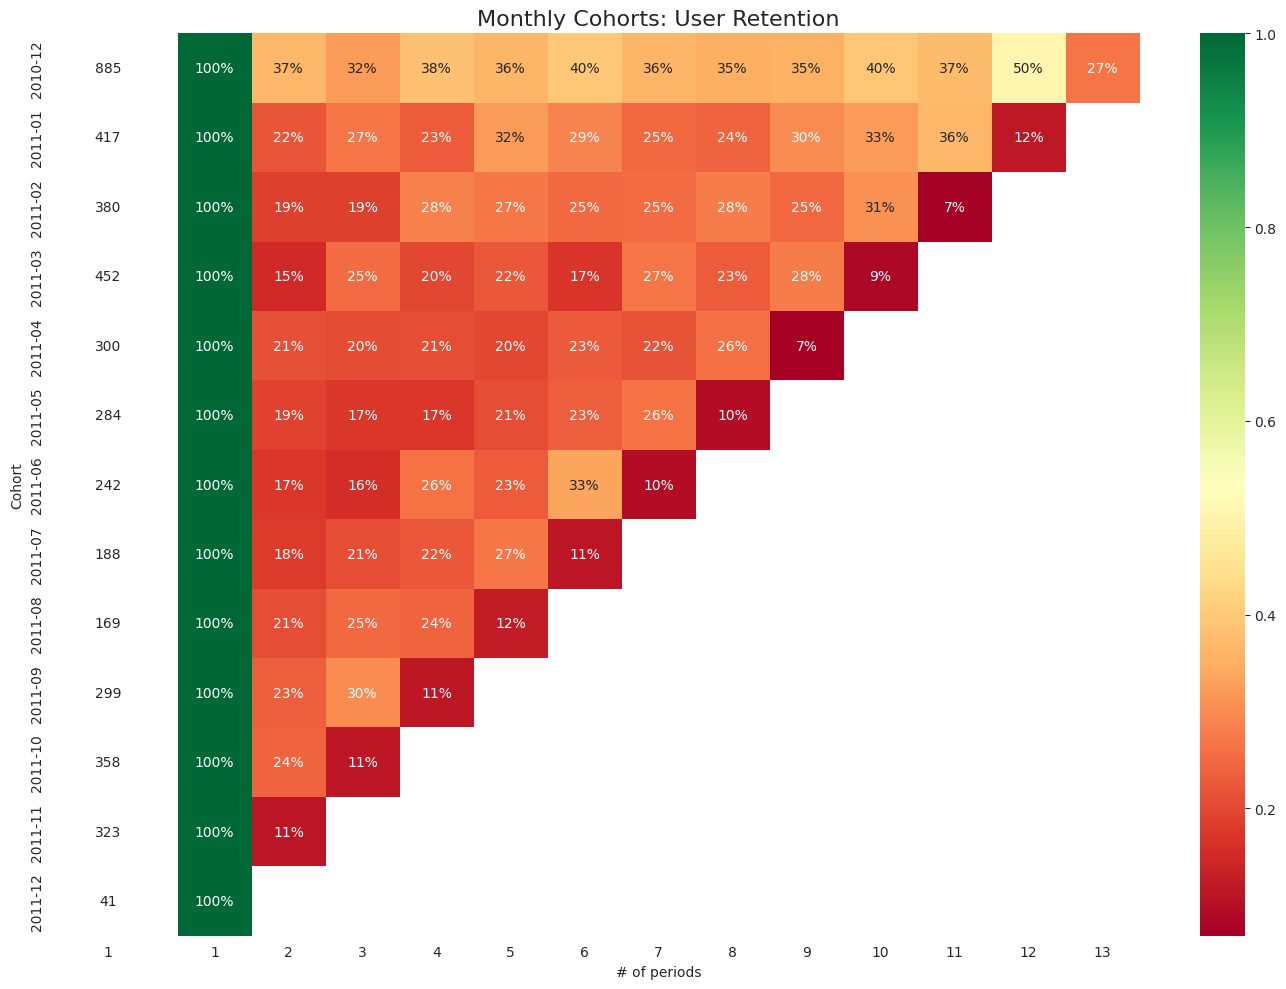

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

**INSIGHT:**


# User Segmentation Using Clustering

In [ ]:
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_clus = df.copy()

In [ ]:
# aggrergate data for completed order
df_user = df_clus.groupby('CustomerID', as_index=False).agg(Frequency=('InvoiceDate','nunique'),
                                                                Max_order_date=('InvoiceDate','max'),
                                                                Monetary=('Sales','sum'))

In [ ]:
# Recency column
today = df_clus['InvoiceDate'].max()
df_user['Recency'] = (today-df_user['Max_order_date']).dt.days

In [ ]:
df_user

,CustomerID,Frequency,Max_order_date,Monetary,Recency
0,12346,1,2011-01-18 10:01:00,77183.60,325
1,12347,7,2011-12-07 15:52:00,4310.00,1
2,12348,4,2011-09-25 13:13:00,1797.24,74
3,12349,1,2011-11-21 09:51:00,1757.55,18
4,12350,1,2011-02-02 16:01:00,334.40,309
...,...,...,...,...,...
4333,18280,1,2011-03-07 09:52:00,180.60,277
4334,18281,1,2011-06-12 10:53:00,80.82,180
4335,18282,2,2011-12-02 11:43:00,178.05,7
4336,18283,16,2011-12-06 12:02:00,2045.53,3


In [ ]:
RFM = df_user.drop(columns=['Max_order_date'])

In [ ]:
RFM

,CustomerID,Frequency,Monetary,Recency
0,12346,1,77183.60,325
1,12347,7,4310.00,1
2,12348,4,1797.24,74
3,12349,1,1757.55,18
4,12350,1,334.40,309
...,...,...,...,...
4333,18280,1,180.60,277
4334,18281,1,80.82,180
4335,18282,2,178.05,7
4336,18283,16,2045.53,3


In [ ]:
RFM_transform = RFM.copy()

In [ ]:
scaler = MinMaxScaler()
RFM_transform[['Frequency','Monetary','Recency']] = scaler.fit_transform(RFM[['Frequency','Monetary','Recency']])

In [ ]:
RFM_transform.describe()

,CustomerID,Frequency,Monetary,Recency
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,0.015554,0.007298,0.245406
std,1721.808492,0.036532,0.032067,0.268135
min,12346.000000,0.000000,0.000000,0.000000
25%,13813.250000,0.000000,0.001080,0.045576
50%,15299.500000,0.004785,0.002373,0.134048
75%,16778.750000,0.019139,0.005913,0.378016
max,18287.000000,1.000000,1.000000,1.000000


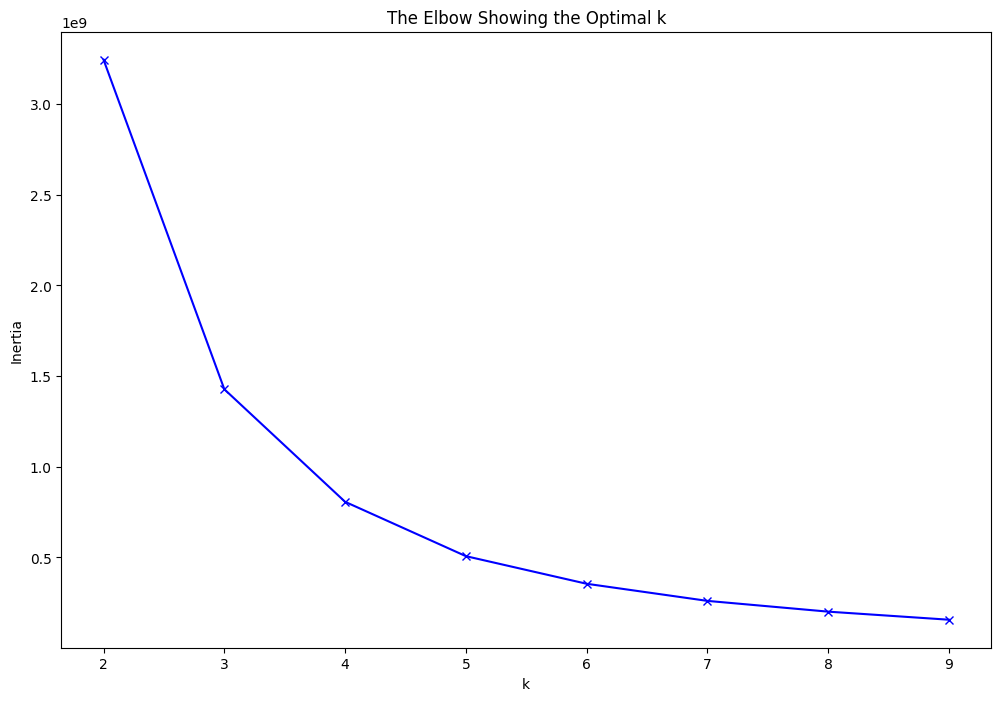

In [ ]:
distortions = []
K = range(2,10)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(RFM_transform)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

In [ ]:
def silhoutte_analysis(data,cluster=range(2,6)):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6238050162675546
For n_clusters = 3 The average silhouette_score is : 0.5908485708079105
For n_clusters = 4 The average silhouette_score is : 0.57068935331513
For n_clusters = 5 The average silhouette_score is : 0.5656390472015704


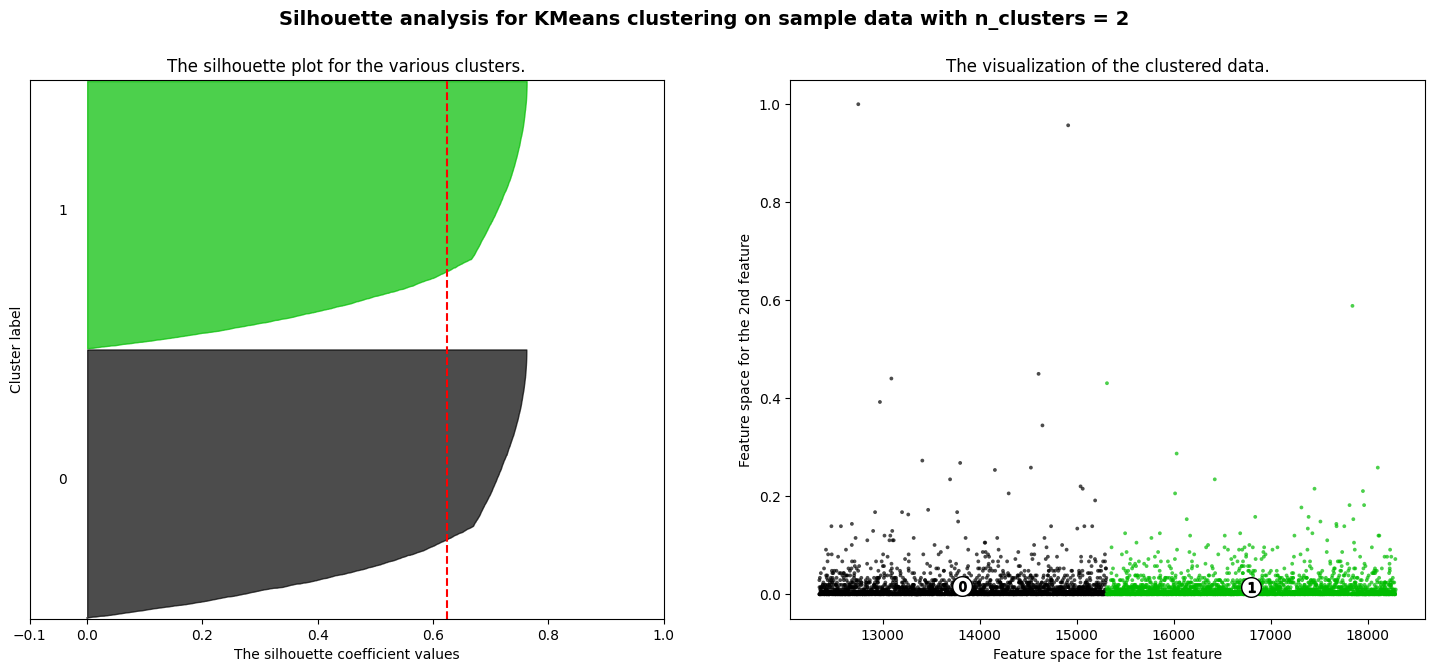

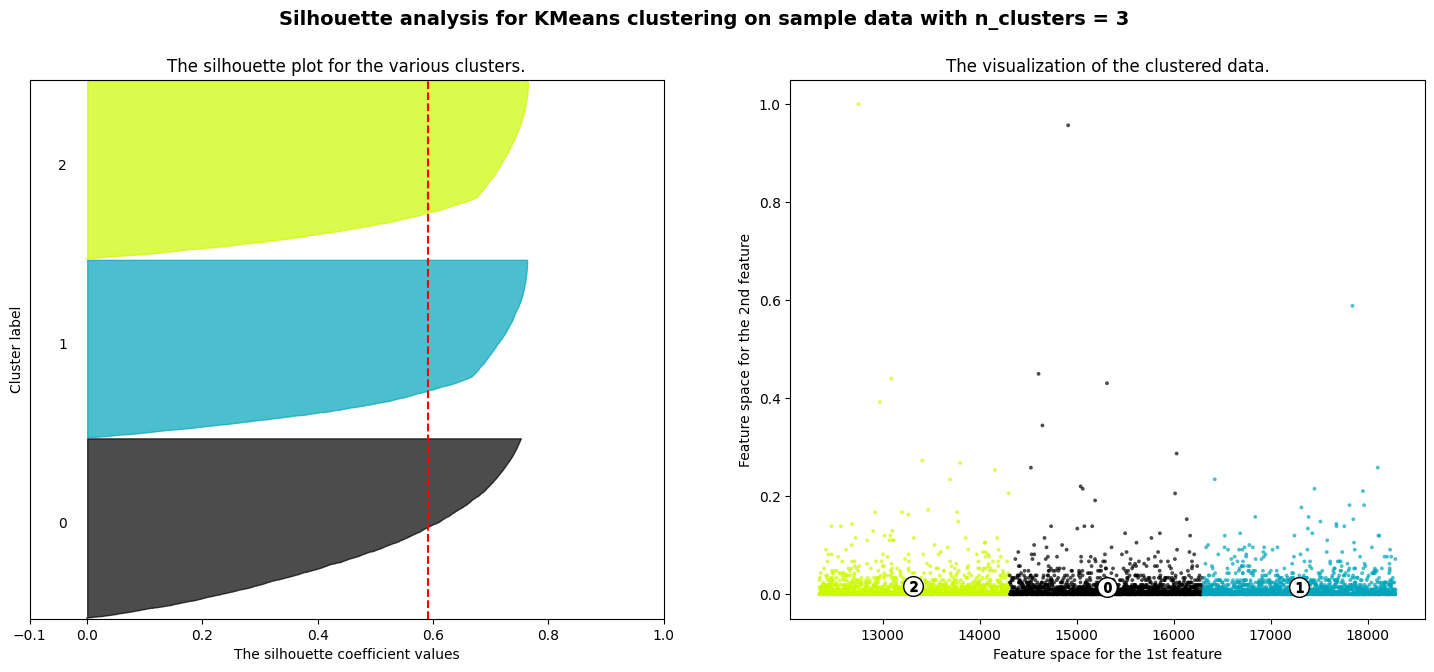

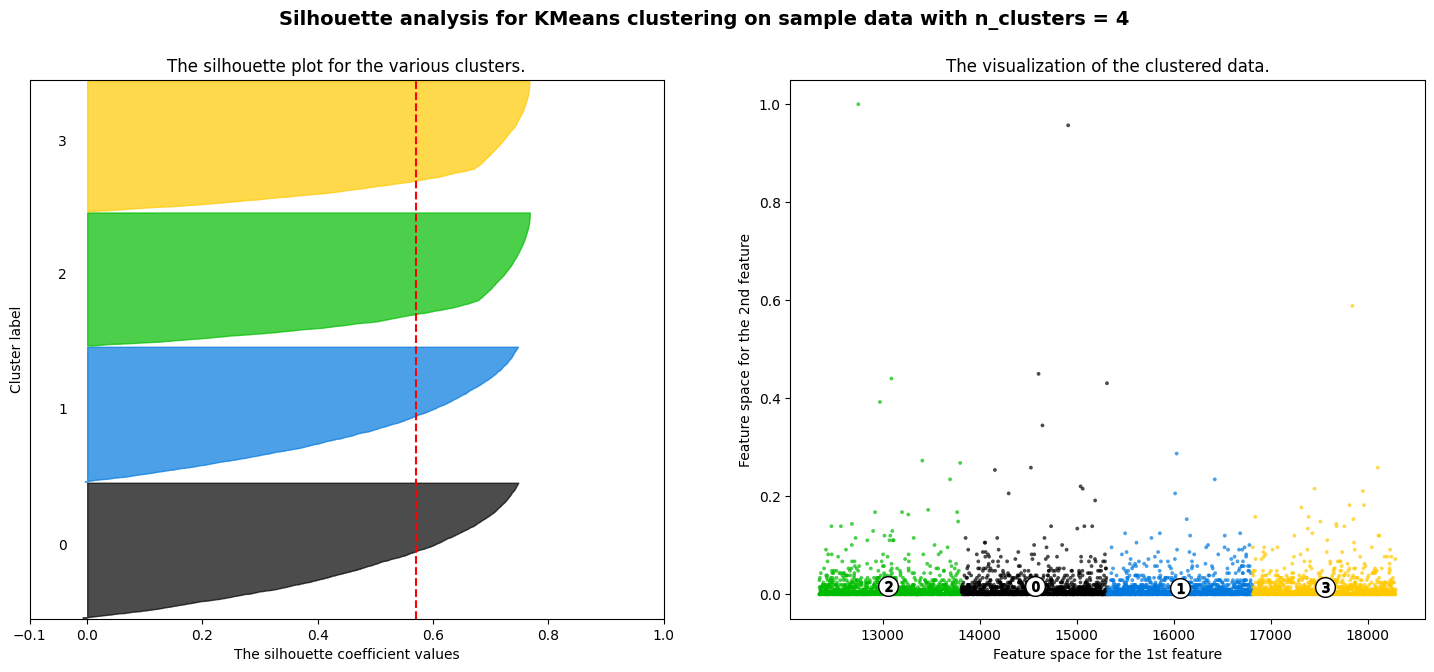

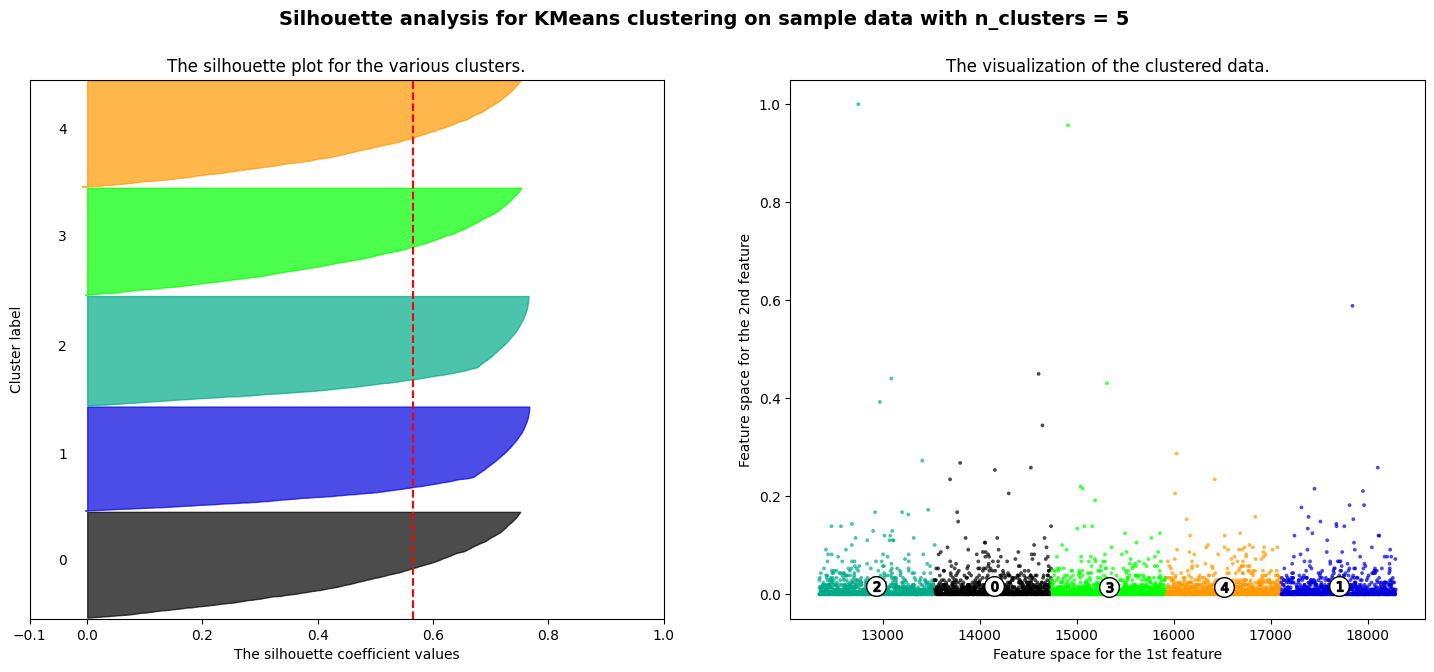

In [ ]:
silhoutte_analysis(RFM_transform,range(2,6))

Note:

From Silhouette Analysis, the highest score is for n_cluster 2, but the elbow method shows the optimal cluster is 3. So we choose 3 as the number of cluster.

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_array = cluster_model.fit(RFM_transform)
cluster_labels = cluster_model.labels_
RFM_transform['Cluster'] = cluster_labels
RFM_transform

,CustomerID,Frequency,Monetary,Recency,Cluster
0,12346,0.000000,0.275443,0.871314,0
1,12347,0.028708,0.015368,0.002681,0
2,12348,0.014354,0.006401,0.198391,0
3,12349,0.000000,0.006259,0.048257,0
4,12350,0.000000,0.001180,0.828418,0
...,...,...,...,...,...
4333,18280,0.000000,0.000631,0.742627,1
4334,18281,0.000000,0.000275,0.482574,1
4335,18282,0.004785,0.000622,0.018767,1
4336,18283,0.071770,0.007287,0.008043,1


In [ ]:
merge =pd.merge(RFM, RFM_transform, on='CustomerID')
merge

,CustomerID,Frequency_x,Monetary_x,Recency_x,Frequency_y,Monetary_y,Recency_y,Cluster
0,12346,1,77183.60,325,0.000000,0.275443,0.871314,0
1,12347,7,4310.00,1,0.028708,0.015368,0.002681,0
2,12348,4,1797.24,74,0.014354,0.006401,0.198391,0
3,12349,1,1757.55,18,0.000000,0.006259,0.048257,0
4,12350,1,334.40,309,0.000000,0.001180,0.828418,0
...,...,...,...,...,...,...,...,...
4333,18280,1,180.60,277,0.000000,0.000631,0.742627,1
4334,18281,1,80.82,180,0.000000,0.000275,0.482574,1
4335,18282,2,178.05,7,0.004785,0.000622,0.018767,1
4336,18283,16,2045.53,3,0.071770,0.007287,0.008043,1


In [ ]:
merge = merge.drop(columns=['Frequency_y','Monetary_y','Recency_y'])

In [ ]:
merge

,CustomerID,Frequency_x,Monetary_x,Recency_x,Cluster
0,12346,1,77183.60,325,0
1,12347,7,4310.00,1,0
2,12348,4,1797.24,74,0
3,12349,1,1757.55,18,0
4,12350,1,334.40,309,0
...,...,...,...,...,...
4333,18280,1,180.60,277,1
4334,18281,1,80.82,180,1
4335,18282,2,178.05,7,1
4336,18283,16,2045.53,3,1


In [ ]:
merge.groupby('Cluster')['Recency_x','Frequency_x','Monetary_x'].agg(['count','min','mean','median','max'])

Recency_x                            Frequency_x                       \
            count min       mean median  max       count min      mean median   
Cluster                                                                         
0            1436   0  90.674095   51.0  373        1436   1  4.380919    2.0   
1            1445   0  90.869896   46.0  373        1445   1  4.197232    2.0   
2            1457   0  93.047358   50.0  373        1457   1  4.175704    2.0   

             Monetary_x                                          
         max      count    min         mean   median        max  
Cluster                                                          
0        210       1436  15.00  2238.463156  775.895  124914.53  
1        124       1445   3.75  1977.741142  587.150  259657.30  
2        201       1457   6.20  1932.010880  663.810  280206.02

In [ ]:
df_cluster = pd.merge(df, merge, on='CustomerID')

In [ ]:
df_cluster

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Frequency_x,Monetary_x,Recency_x,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,33,5391.21,371,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,33,5391.21,371,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,33,5391.21,371,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,33,5391.21,371,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,33,5391.21,371,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,15.00,1,848.55,0,0
392688,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,1,848.55,0,0
392689,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,1,848.55,0,0
392690,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,24.96,1,848.55,0,0


Intepretation Cluster:


Cluster 0: VIP

- Highest average spending

- Highest average frequency

- Lowest average recency


Cluster 1: LOST

- Most number of people

- Lowest average spending

- Lowest average frequency

- Highest average recency


Cluster 2: REGULAR

- Less number of people

- Medium average spending

- Medium average frequency

- Medium average recency


In [ ]:
df_cluster.to_csv('/content/drive/My Drive/UK Gift Ecommerce/uk_gift_ecommerce.csv')